In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [263]:
df_train = pd.read_csv("../aviakompaniya_qoniqish/train_dataset.csv", index_col=0)
df_test = pd.read_csv("../aviakompaniya_qoniqish/test_dataset.csv", index_col=0)
df_train.head(3)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,4,...,4,3,1,3,4,3,4,10,3.0,0
2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,4,...,5,5,5,5,3,5,3,0,0.0,1
3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,...,1,1,1,1,1,1,2,0,18.0,0


In [264]:
df_train.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [265]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int64  


In [266]:
df_train['satisfaction'].value_counts()

satisfaction
0    5000
1    5000
Name: count, dtype: int64

In [267]:
df_train.isnull().sum()

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [268]:
df_train['Gender'].replace({'Female':2, 'Male':1}, inplace=True)

In [269]:
df_add1 = pd.get_dummies(df_train[['Customer Type', 'Class', 'Type of Travel']], dtype='int')
df_add1 = pd.DataFrame(df_add1)
df_train = pd.concat([df_train, df_add1], axis=1)
df_train.drop(columns=['Customer Type', 'Class', 'Type of Travel'], inplace=True)

In [270]:
df_train

,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,Type of Travel_Business travel,Type of Travel_Personal Travel
id,,,,,,,,,,,,,,,,,,,,,
1,1,33,571,2,3,2,4,4,2,4,...,10,3.0,0,0,1,0,1,0,1,0
2,2,49,1431,4,1,4,4,3,5,4,...,0,0.0,1,1,0,1,0,0,1,0
3,2,43,867,1,4,4,4,4,4,3,...,0,18.0,0,1,0,0,1,0,1,0
4,2,27,1550,3,3,3,3,2,2,2,...,0,0.0,1,1,0,1,0,0,1,0
5,1,11,526,3,4,3,2,4,3,4,...,0,10.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2,54,1068,1,4,1,2,2,5,4,...,21,12.0,0,1,0,0,1,0,0,1
9997,2,54,1399,4,1,1,1,2,3,3,...,34,21.0,0,1,0,0,0,1,1,0
9998,1,46,1440,3,3,2,3,3,4,5,...,37,38.0,1,1,0,1,0,0,1,0


In [271]:
df_train['Arrival Delay in Minutes'] = df_train['Arrival Delay in Minutes'].fillna(df_train['Arrival Delay in Minutes'].mean())

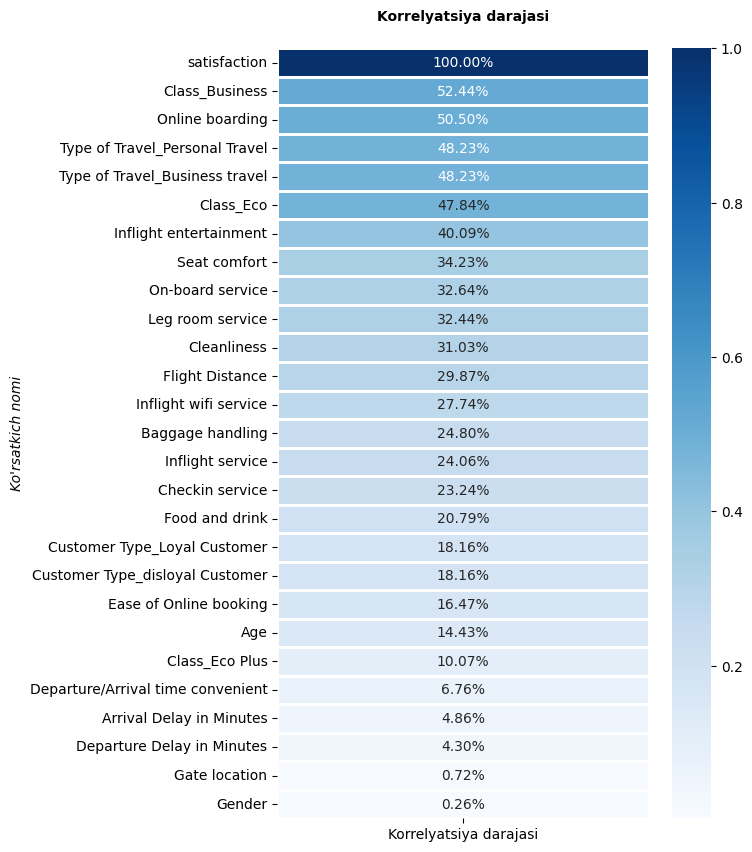

In [272]:
plt.figure(figsize=(6, 10))
sns.heatmap(data=pd.DataFrame(df_train.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False), columns=['Korrelyatsiya darajasi']),
            linewidths=1,
            cbar=True,
            cmap='Blues',
            annot=True,
            fmt=".2%")
plt.title("Korrelyatsiya darajasi",
          fontfamily='sans serif',
          fontweight='bold',
          pad=20,
          fontsize=10)
plt.ylabel("Ko'rsatkich nomi",
           fontstyle = 'italic',
           fontfamily='sans serif',
           fontsize=10,
           fontweight=1)
plt.show()

In [273]:
df_train.describe()

,Gender,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Class_Business,Class_Eco,Class_Eco Plus,Type of Travel_Business travel,Type of Travel_Personal Travel
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.516900,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,...,14.429900,14.709888,0.500000,0.830700,0.169300,0.504800,0.425100,0.070100,0.707900,0.292100
std,0.499739,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,...,39.659674,39.990245,0.500025,0.375035,0.375035,0.500002,0.494383,0.255328,0.454751,0.454751
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,...,0.000000,0.000000,0.500000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2.000000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,...,12.000000,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,2.000000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,...,921.000000,924.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Train and test datalarga bo'lish

In [274]:
X = df_train.drop('satisfaction', axis=1)
Y = df_train['satisfaction']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

In [275]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       247
           1       0.93      0.83      0.88       253

    accuracy                           0.88       500
   macro avg       0.89      0.88      0.88       500
weighted avg       0.89      0.88      0.88       500



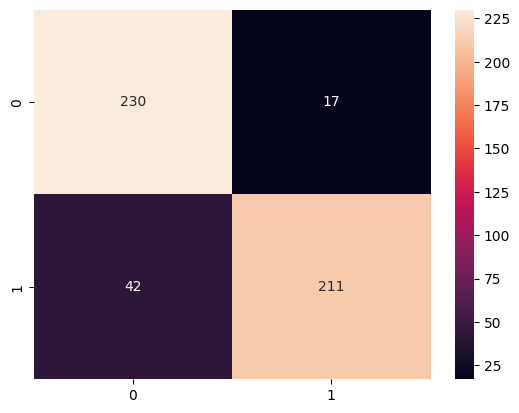

In [276]:
LR_model = LogisticRegression()
LR_model.fit(X_train_scaled, Y_train)

lr_predictions = LR_model.predict(X_test_scaled)
print(metrics.classification_report(Y_test, lr_predictions))

#confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, lr_predictions)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

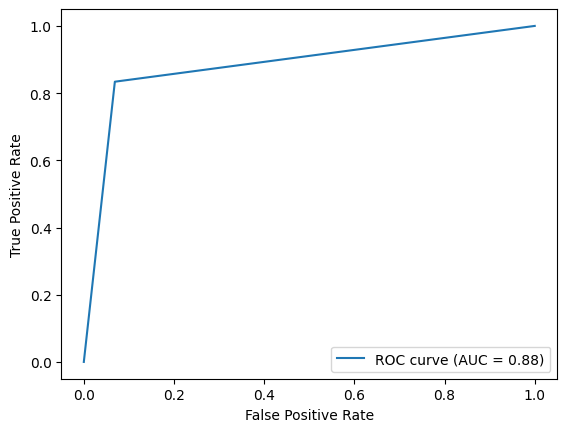

In [277]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, lr_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Support Vector Machines

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       247
           1       0.95      0.91      0.93       253

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



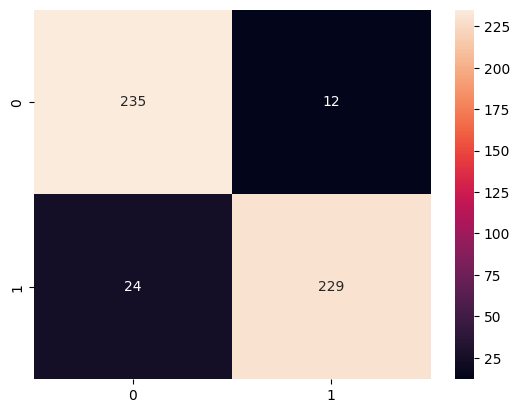

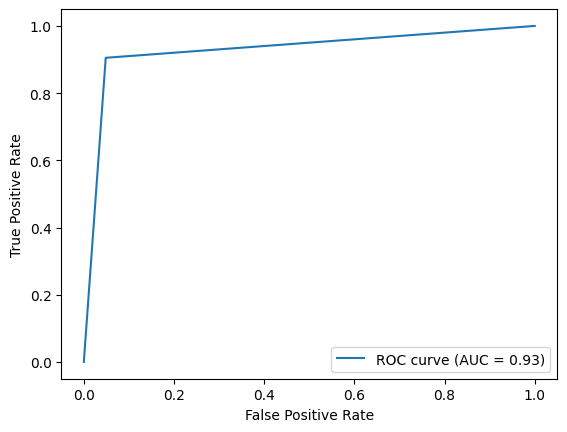

In [278]:
svm_model = SVC()
svm_model.fit(X_train_scaled, Y_train)

svm_predictions = svm_model.predict(X_test_scaled)
print(metrics.classification_report(Y_test, svm_predictions))

#confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, svm_predictions)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, svm_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Decision Tree

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       247
           1       0.93      0.92      0.92       253

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



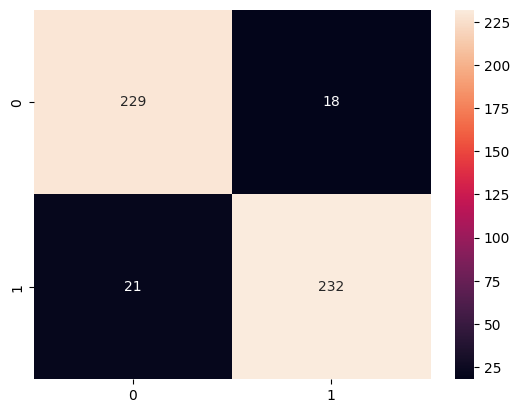

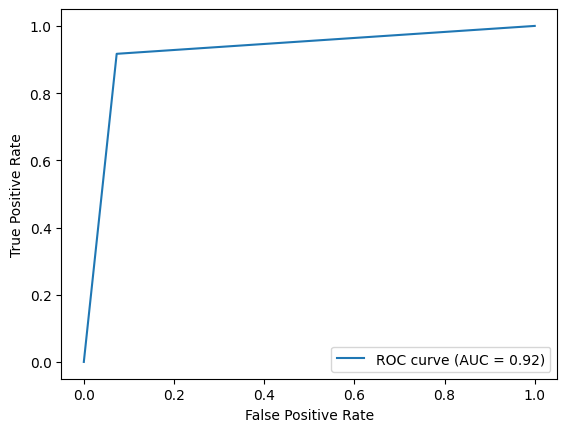

In [279]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train_scaled, Y_train)

tree_predictions = tree_model.predict(X_test_scaled)
print(metrics.classification_report(Y_test, tree_predictions))

#confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, tree_predictions)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, tree_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Random Forest Classifier

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       247
           1       0.96      0.93      0.95       253

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



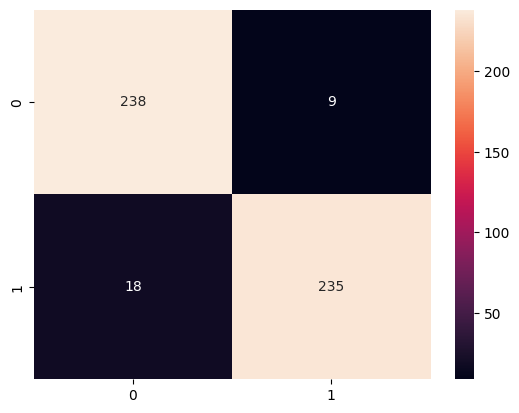

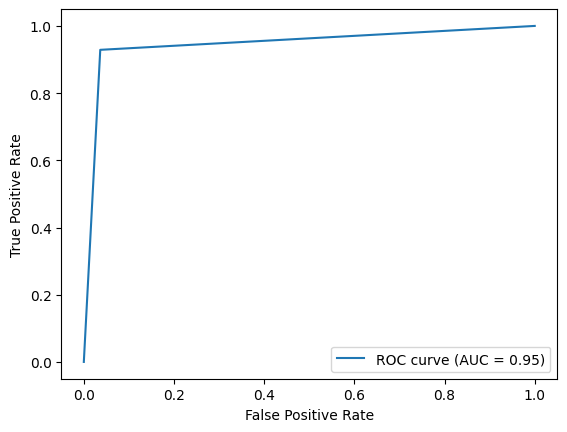

In [280]:
forest_model = RandomForestClassifier(n_estimators=500)
forest_model.fit(X_train_scaled, Y_train)

forest_predictions = forest_model.predict(X_test_scaled)
print(metrics.classification_report(Y_test, forest_predictions))

#confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, forest_predictions)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

fpr, tpr, thresholds = metrics.roc_curve(Y_test, forest_predictions)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

# Testing

In [281]:
df_test['Gender'].replace({'Female':2, 'Male':1}, inplace=True)
df_add2 = pd.get_dummies(df_test[['Customer Type', 'Class', 'Type of Travel']], dtype='int')
df_add2 = pd.DataFrame(df_add2)
df_test = pd.concat([df_test, df_add2], axis=1)
df_test.drop(columns=['Customer Type', 'Class', 'Type of Travel'], inplace=True)
df_test['Arrival Delay in Minutes'] = df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].mean())

In [282]:
scaler = StandardScaler()
X_testing = scaler.fit_transform(df_test)

In [283]:
testing_predictions = forest_model.predict(X_testing)
testing_predictions = pd.DataFrame(testing_predictions)
testing_predictions.to_csv('../aviakompaniya_qoniqish/testing_predictions.csv')

In [285]:
import joblib

joblib.dump(forest_model, 'RFC_model.pkl')

['RFC_model.pkl']